In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#this will load the train and test digits in (X_train,y_train),(X_test,y_test)
(X_train , y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train) 
# 60k digits(images) in X_train

60000

In [4]:
len(X_test)
# 60k digits(images) in X_test

10000

In [5]:
# 1 image is (28 x 28) dimension (0 - 255) values
(X_train[0]).shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

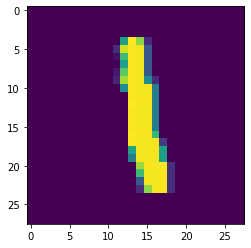

In [7]:
plt.imshow(X_train[6])
plt.show()

In [8]:
y_train[6]

1

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
# scale the images
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
#flatten the 2d image into 1 d array
# we want to no. of images in X_train=60k it will be same here
# and if the image is 6*6 , we want it to be 36
X_train_flattened= X_train.reshape(len(X_train) ,28*28 )
X_train_flattened.shape

(60000, 784)

In [14]:
# X_test flattened
X_test_flattened= X_test.reshape(len(X_test) ,28*28 )
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0].shape
# shape is changed for an image from 2d to 1d

(784,)

In [16]:
# 'Sequential' groups a linear stack of layers into a `tf.keras.Model`.
# Dense means Just your regular densely-connected NN layer.
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,) ,activation='sigmoid')
])

# compile the NN
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

# train the model
model.fit(X_train_flattened,y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4709 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2827 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9252


In [17]:
# evaluate the accuracy on test dataset
model.evaluate(x=X_test_flattened,y=y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2675 - accuracy: 0.9250


[0.2675272822380066, 0.925000011920929]

(784,)


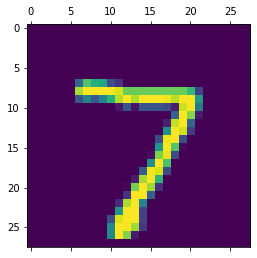

In [22]:
# 1st image in test set
plt.matshow(X_test[0])
print(X_test_flattened[0].shape)

In [24]:
y_predicted = model.predict(x=X_test_flattened)
y_predicted[0]

array([1.1099577e-02, 5.9547006e-07, 3.8762867e-02, 9.5947099e-01,
       2.6587248e-03, 1.2715816e-01, 1.6090914e-06, 9.9976593e-01,
       7.2663069e-02, 6.4376336e-01], dtype=float32)

In [25]:
np.argmax(y_predicted[0])

7

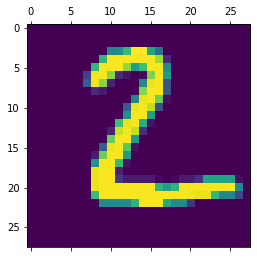

In [26]:
# try another image
plt.matshow(X_test[1])

In [27]:
y_predicted[1]

array([1.8978238e-01, 3.0434132e-03, 9.9924827e-01, 2.7666259e-01,
       4.2899892e-10, 8.2665598e-01, 8.9420176e-01, 1.0671673e-12,
       1.7352742e-01, 2.1964985e-09], dtype=float32)

In [28]:
np.argmax(y_predicted[1]) #correct prediction

2

In [30]:
y_predicted_labels = [np.argmax(x) for x in y_predicted] 
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [29]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [31]:
# confusion matrix
#  "predictions " must be integers(0,1,2,3...) not whole no's(2.3,5.3,56.6,..)
# so for that we need to convert y_predicted into y_predicted_labels
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 944,    0,    2,    2,    1,    9,   14,    3,    3,    2],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    9,  922,   18,    8,    6,   13,   10,   38,    5],
       [   1,    0,   16,  913,    1,   35,    4,    9,   22,    9],
       [   1,    2,    2,    1,  918,    0,   13,    3,    8,   34],
       [   6,    3,    2,   21,   11,  784,   16,    6,   36,    7],
       [   6,    3,    5,    1,    7,   12,  920,    2,    2,    0],
       [   1,    9,   21,    7,    9,    1,    0,  938,    1,   41],
       [   4,   10,    6,   19,    9,   23,   10,   10,  870,   13],
       [   7,    7,    2,    8,   29,    7,    0,   17,    7,  925]])>

Text(69.0, 0.5, 'Truth')

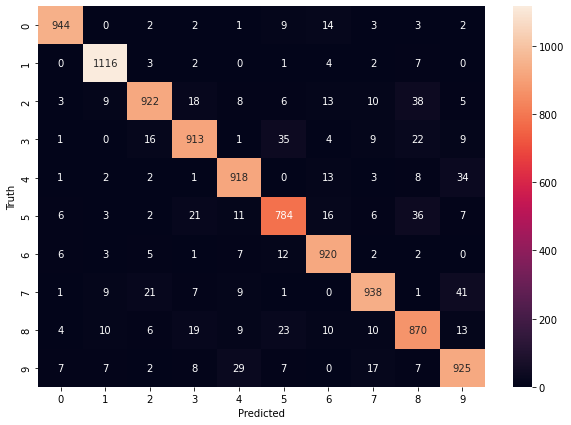

In [32]:
# visualizing the confusion matrix
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
'''
944 times the label was 0 and the model predicted it 0
1116 times the label was 1 and the model predicted it 1 . 9 times the label was 2 and model predicted it 1
Anything which are not in diagonals are errors
'''

In [33]:
# ADDING A HIDDEN LAYER which has 100 neurons< input shape
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,) ,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

# compile the NN
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

# train the model
model.fit(X_train_flattened,y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.9200
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1272 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0899 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9841


In [34]:
# evaluate the accuracy of model on test dataset
model.evaluate(x=X_test_flattened,y=y_test)
# accuracy = 97 % and loss = 8% . Better than when we do not have hidden layer

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9745


[0.08054625242948532, 0.9745000004768372]

Text(69.0, 0.5, 'Truth')

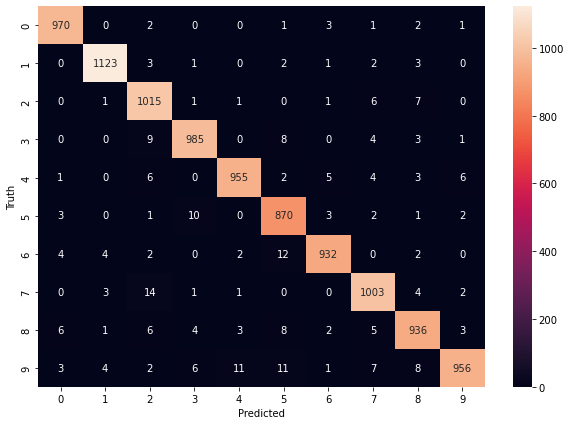

In [35]:
y_predicted = model.predict(x=X_test_flattened)
y_predicted_labels = [np.argmax(x) for x in y_predicted]  #for confusion matrix as it need integers not whole no's
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


# visualizing the confusion matrix
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# the no's of erros on the black boxes have decreased

# keras.layers.Flatten()

In [36]:
# to fit the model , we had to pass X_train_flattened (which we had to do by ourself).
# Whereas keras also comes with inbuilt Flatten() - which flattens the input


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100 ,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

# compile the NN
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

# train the model
model.fit(X_train,y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1240 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9844


In [38]:
model.evaluate(x=X_test,y=y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0862 - accuracy: 0.9743


[0.08623170107603073, 0.9743000268936157]

Text(69.0, 0.5, 'Truth')

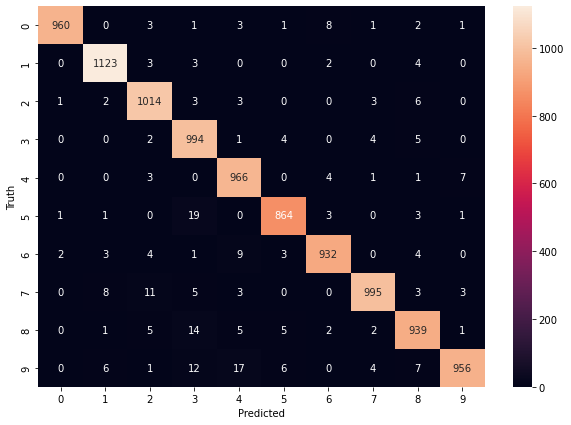

In [40]:
y_predicted = model.predict(x=X_test)
y_predicted_labels = [np.argmax(x) for x in y_predicted]  #for confusion matrix as it need integers not whole no's
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


# visualizing the confusion matrix
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')